## Step 1: Import libraries + load data

In [4]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the heart disease dataset
df = pd.read_csv('/content/heart.csv')

# Display first 5 rows to understand the structure of the data
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Step 2: Basic dataset understanding

In [5]:
# Check number of rows and columns
df.shape


(1025, 14)

In [6]:
# Get information about columns, data types, and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# Statistical summary of numerical columns
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Dataset Feature Description (Data Dictionary)


### Variables
| Variable   | Full Form / Meaning |
|------------|---------------------|
| age        | Age of the patient (in years) |
| sex        | Sex of the patient (1 = male, 0 = female) |
| cp         | Chest Pain Type (0–3, different types of chest pain) |
| trestbps   | Resting Blood Pressure (in mm Hg) |
| chol       | Serum Cholesterol (in mg/dl) |
| fbs        | Fasting Blood Sugar (>120 mg/dl: 1 = true, 0 = false) |
| restecg    | Resting Electrocardiographic Results (0–2) |
| thalach    | Maximum Heart Rate Achieved |
| exang      | Exercise-Induced Angina (1 = yes, 0 = no) |
| oldpeak    | ST Depression Induced by Exercise Relative to Rest |
| slope      | Slope of the Peak Exercise ST Segment |
| ca         | Number of Major Vessels Colored by Fluoroscopy (0–3) |
| thal       | Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect) |
| target     | Heart Disease Presence (1 = disease, 0 = no disease) |


This table provides a clear description of each feature to support interpretability and reproducibility of the analysis.


##Step 3: How to CHECK missing values (important step)

In [8]:
# Check missing values in each column
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


##Step 4: Target Variable Analysis

In [9]:
# Count how many patients have heart disease vs not
df['target'].value_counts()


,count
target,
1,526
0,499


##Step 5: Visualize Target Variable Distribution

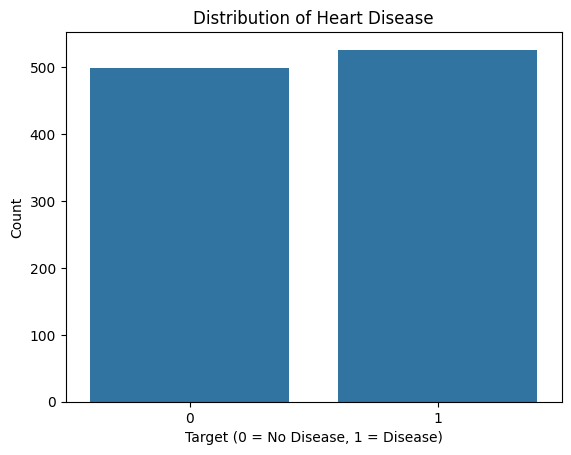

In [10]:
# Visualizing the distribution of heart disease cases
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()


##Step 6: Univariate Analysis (core EDA)

### 1.Age Distribution

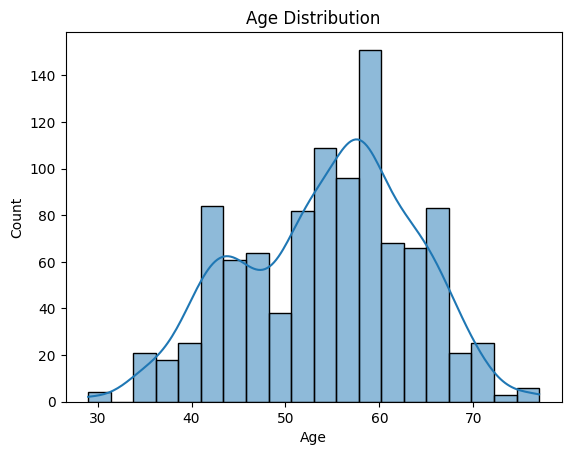

In [11]:
# Distribution of age
plt.figure()
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### 2.Sex Distribution

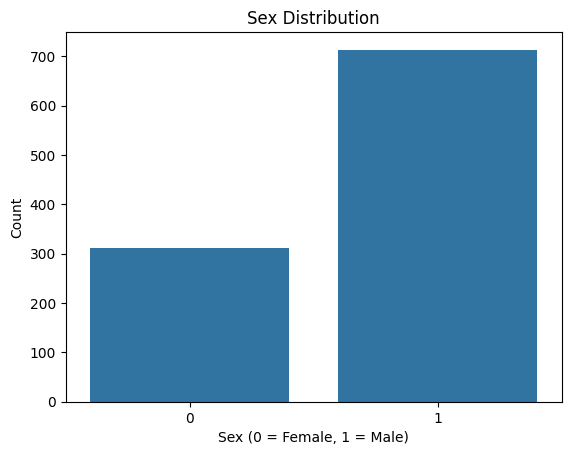

In [12]:
# Gender distribution (0 = female, 1 = male)
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


### 3.Chest Pain Type (cp)

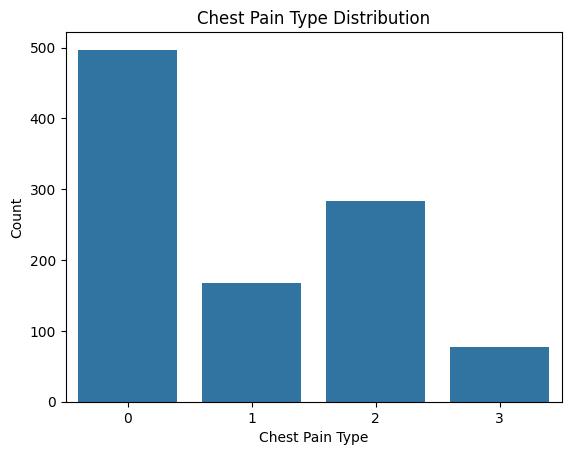

In [13]:
# Chest pain type distribution
sns.countplot(x='cp', data=df)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


## Step 7: Univariate ➜ Target Analysis

### 1.Age vs Target

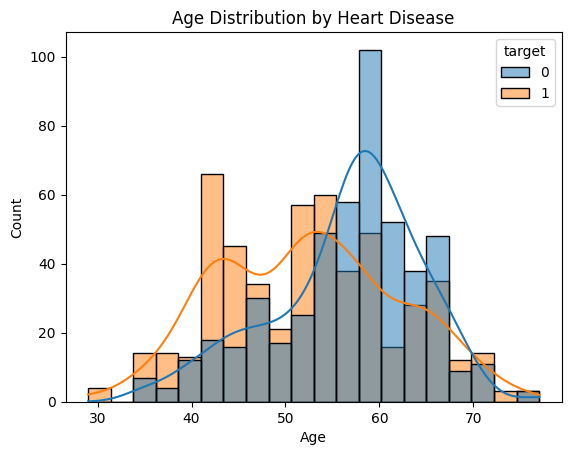

In [17]:
# Age distribution split by heart disease
plt.figure()
sns.histplot(data=df, x='age', hue='target', bins=20, kde=1)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### 2.Sex vs Target

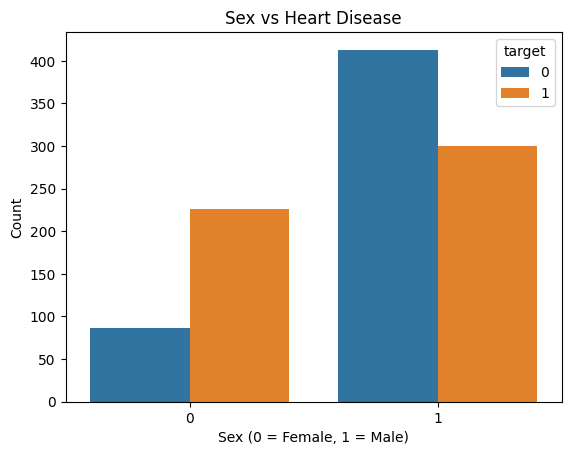

In [15]:
# Sex vs heart disease
sns.countplot(x='sex', hue='target', data=df)
plt.title('Sex vs Heart Disease')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


### 3.Chest Pain vs Target

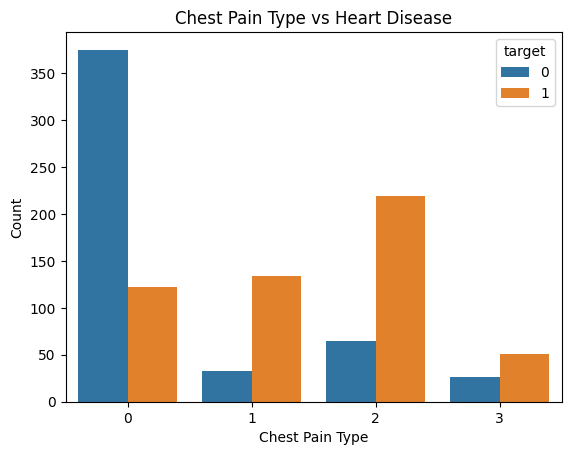

In [18]:
# Chest pain type vs heart disease
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


## Step 8: Correlation Analysis

### 1.Correlation Matrix

In [19]:
# Compute correlation matrix
corr = df.corr()

# Display correlation with target
corr['target'].sort_values(ascending=False)


,target
target,1.000000
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


### 2.Correlation Heatmap (visual)

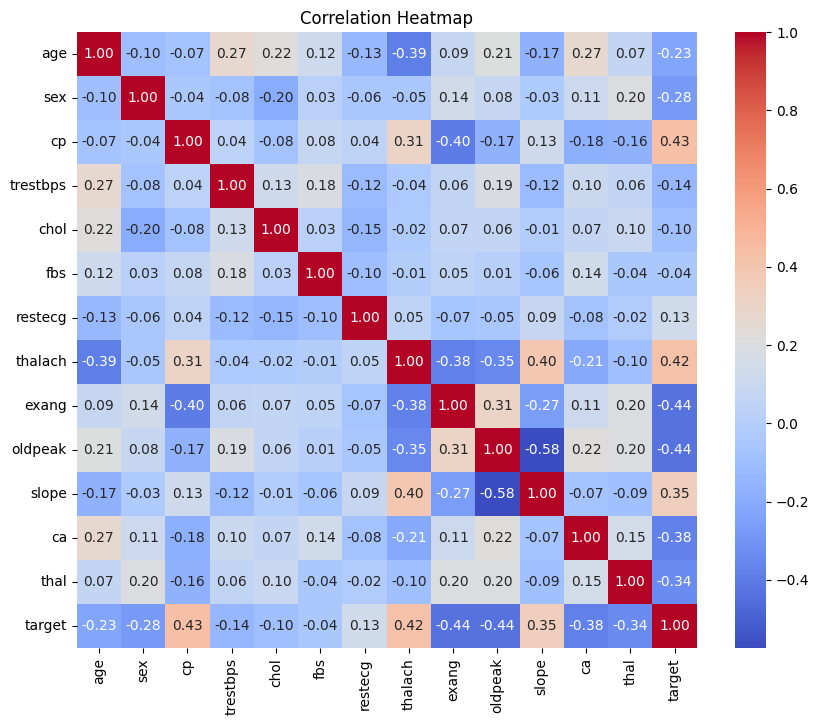

In [20]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Step 9: FINAL STEP: Insights & Conclusion (Portfolio-Ready)

## Key Insights

- Chest pain type (`cp`) shows a strong positive correlation with heart disease, making it one of the most important associated features.
- Maximum heart rate achieved (`thalach`) is positively associated with heart disease, indicating patients with certain heart rate patterns are more affected.
- Exercise-induced angina (`exang`) and ST depression (`oldpeak`) show strong negative correlations with the target, suggesting they play a critical role in heart disease detection.
- Features such as number of major vessels (`ca`) and thalassemia (`thal`) also show moderate negative correlation with heart disease.
- Age and sex show weaker correlations compared to clinical features, indicating that physiological indicators are more informative in this dataset.


## Conclusion

In this exploratory data analysis, we examined a heart disease dataset to understand the distribution of patient attributes and their relationship with heart disease. Through univariate, bivariate, and correlation analysis, we identified key features that are strongly associated with heart disease.

This analysis provides a strong foundation for future steps such as feature selection and predictive modeling. EDA helped uncover patterns, relationships, and potential insights without building any machine learning model.
